In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gld_price_data.csv',parse_dates=['Date'])
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.1800,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.2850,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.1670,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.0530,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,2018-05-08,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2018-05-09,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2018-05-10,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2018-05-14,2730.129883,124.489998,14.380000,15.5600,1.193118


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


In [ ]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
df.head(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180000,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285000,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167000,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053000,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590000,1.557099
5,2008-01-09,1409.130005,86.550003,75.250000,15.520000,1.466405
6,2008-01-10,1420.329956,88.250000,74.019997,16.061001,1.480100
7,2008-01-11,1401.020020,88.580002,73.089996,16.077000,1.479006
8,2008-01-14,1416.250000,89.540001,74.250000,16.280001,1.486900
9,2008-01-15,1380.949951,87.989998,72.779999,15.834000,1.480210


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

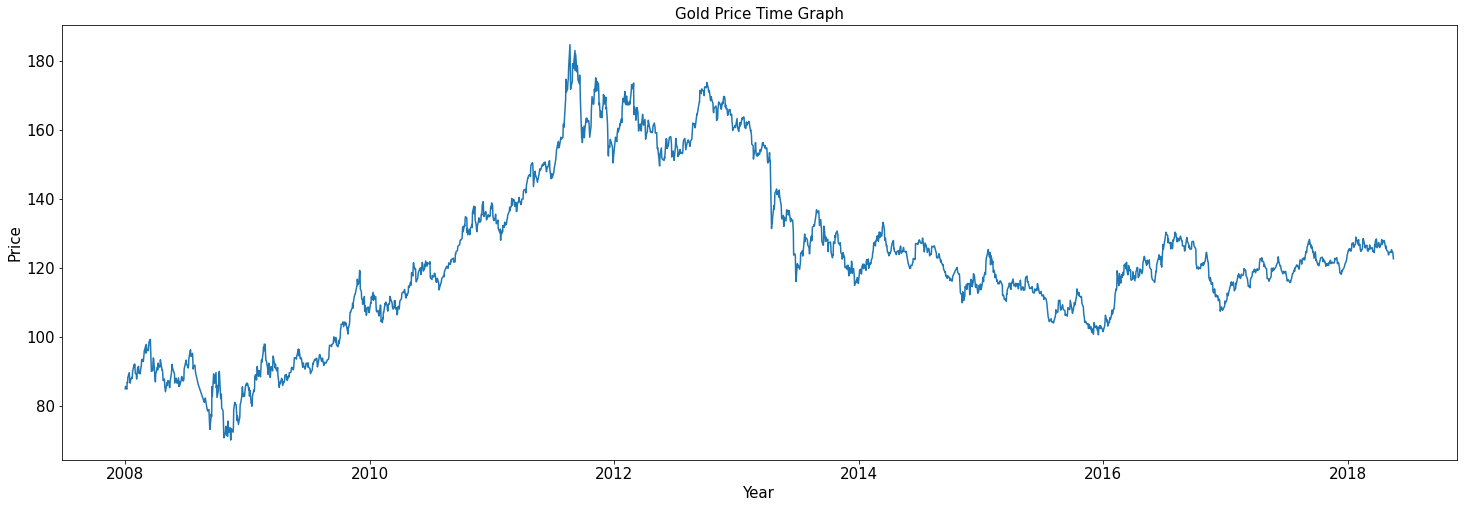

In [ ]:
plt.figure(figsize=(25,8))
plt.xticks(rotation=0,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.title('Gold Price Time Graph',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.plot(df.Date,df.GLD)
plt.show()

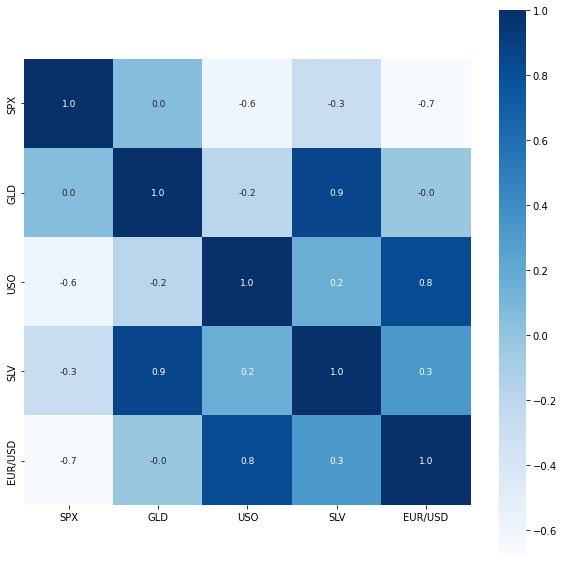

In [ ]:
plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':9},cmap='Blues'  )

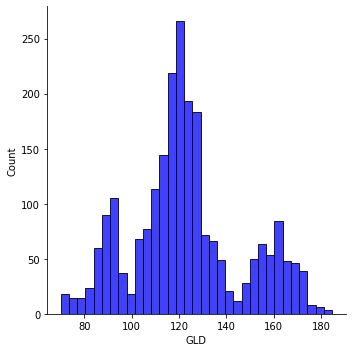

In [ ]:
sns.displot(df.GLD,color='b')

In [ ]:
x = df.drop(['Date','GLD'],axis=1)
y= df['GLD']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_train_pred = model.predict(x_train)
train_score = r2_score(y_train,y_train_pred)
print(f'Train Data Accuracy : {round(train_score*100,2)} %')

Train Data Accuracy : 99.85 %


In [ ]:
y_test_pred = model.predict(x_test)
test_score = r2_score(y_test,y_test_pred)
print(f'Train Data Accuracy : {round(test_score*100,2)} %')

Train Data Accuracy : 98.63 %


In [ ]:
n = int(input('Enter row no to test model : '))
print(y[n:n+1])
model.predict(x[n:n+1])


Enter row no to test model : 56
56    92.730003
Name: GLD, dtype: float64


array([92.67050192])